# KFold, Encoding, Gradient Boosting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Extraction

In [2]:
df = pd.read_csv('Pokemon.csv')

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [5]:
df.describe(include='O')

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Unown,Water,Flying
freq,1,112,97


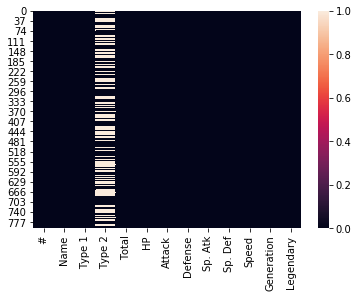

In [6]:
sns.heatmap(df.isnull())

## Handle Missing Value

In [9]:
df['Type 2'] = df['Type 2'].fillna(df['Type 1'])

## Feature Engineering

### Categorical Colomn Encoding

In [10]:
from category_encoders import BinaryEncoder

In [23]:
binaryEnc = BinaryEncoder(cols=['Type 1','Type 2'],drop_invariant=True)

In [28]:
x = binaryEnc.fit_transform(df).drop(['Name','Legendary' , '#'] ,axis=1)

In [29]:
y = df['Legendary']

# Modelling With CV

In [30]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold

In [31]:
from sklearn.linear_model import LogisticRegression

In [37]:
cv_score = cross_val_score(LogisticRegression() , x,y,cv = 10 ,scoring='recall')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [39]:
cv_score

array([0.42857143, 0.        , 0.28571429, 0.28571429, 0.28571429,
       0.        , 0.        , 0.16666667, 0.33333333, 0.33333333])

In [74]:
from sklearn.metrics import confusion_matrix,classification_report,matthews_corrcoef, log_loss, roc_auc_score
from sklearn.metrics import recall_score,precision_score,f1_score
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
def cv_reports(x,y,n_splits,model):
    kf = KFold(n_splits=n_splits,shuffle=True)
    num = 1
    list_score = []
    iteration = []
    for train_index, test_index in kf.split(x,y):
    #     data_test = df.iloc[test_index]
    #     data_train = df.iloc[train_index]
        X_test, X_train, y_test, y_train = x.iloc[test_index] , x.iloc[train_index] , y.iloc[test_index],y.iloc[train_index]
        model.fit(X_train,y_train)
        prediction_test = model.predict(X_test)
        prediction_train = model.predict(X_train)
        list_metrics = [matthews_corrcoef,log_loss,recall_score,precision_score,f1_score]
        list_name = ['Matt_coer_coeff' , 'Log_loss','Recall','Precision' , 'F1']
        metrics = {}
        iteration.append('iteration ke {}'.format(num))
        num += 1
        for i,item in enumerate(list_metrics):
            metric_train = item(y_train,prediction_train)
            metric_test = item(y_test,prediction_test)
            metrics['{} train'.format(list_name[i])] = round(metric_train,2)
            metrics['{} test'.format(list_name[i])] = round(metric_test,2)
        list_score.append(metrics)
    df_temp = pd.DataFrame(list_score,index=iteration)
    list_mean = []
    for col in df_temp.columns :
         list_mean.append(df_temp[col].mean())
    df_temp.loc['Average'] = list_mean
    return df_temp

In [111]:
cv_reports(x,y,5,GradientBoostingClassifier(n_estimators=100))

,F1 test,F1 train,Log_loss test,Log_loss train,Matt_coer_coeff test,Matt_coer_coeff train,Precision test,Precision train,Recall test,Recall train
iteration ke 1,0.730,1.0,1.730,0.0,0.710,1.0,0.730,1.0,0.730,1.0
iteration ke 2,0.770,1.0,1.510,0.0,0.760,1.0,0.670,1.0,0.920,1.0
iteration ke 3,0.670,1.0,1.730,0.0,0.640,1.0,0.670,1.0,0.670,1.0
iteration ke 4,0.820,1.0,0.650,0.0,0.820,1.0,0.880,1.0,0.780,1.0
iteration ke 5,0.900,1.0,0.650,0.0,0.890,1.0,0.930,1.0,0.880,1.0
Average,0.778,1.0,1.254,0.0,0.764,1.0,0.776,1.0,0.796,1.0


In [ ]:
cv_reports(x,y,5)